# <center> CAPSTONE PROJECT - BATTLE OF NEIGHBORHOODS </center>

## Business statement

<span style= 'font-family:Verdana; font-size:1.2em'> Almost everyone loves coffee. It has been said that some 330 million cup of coffee are consumed everyday.The idea of this study is to help people planning to start a new coffee shop in Salem to choose a right location where in Salem would it be best to open a cafe and what  location seems to be the most popular. </span>


In [1]:
# import all the necessary packages
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [2]:
import matplotlib.pyplot

In [3]:
# Get longitude and latitude for Salem

address = 'Salem, Tamilnadu'

geolocator = Nominatim(user_agent="rio_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Salem(Tamilnadu) is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Salem(Tamilnadu) is 11.6612012, 78.1602498.


In [4]:
# Set up Foursquare

CLIENT_ID = '4E132IAZHY1W2KW2SQMT2CB5EZIGCUL5VYGPSZ34RBTTZLOY' # your Foursquare ID
CLIENT_SECRET = 'VEINKI54F43PC5YX4BPAYDCKP0RMQKSBB4DLZITUZ3MLKLMR' # your Foursquare Secret
VERSION = '20191105' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4E132IAZHY1W2KW2SQMT2CB5EZIGCUL5VYGPSZ34RBTTZLOY
CLIENT_SECRET:VEINKI54F43PC5YX4BPAYDCKP0RMQKSBB4DLZITUZ3MLKLMR


In [5]:
search_query = 'Coffee shops'
search_query2 = 'Cafe'
search_query3 = 'Restaurants'
radius = 50000
print(str(search_query) + ' .... OK!')

Coffee shops .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query+search_query2+search_query3, radius, LIMIT)
url 

'https://api.foursquare.com/v2/venues/search?client_id=4E132IAZHY1W2KW2SQMT2CB5EZIGCUL5VYGPSZ34RBTTZLOY&client_secret=VEINKI54F43PC5YX4BPAYDCKP0RMQKSBB4DLZITUZ3MLKLMR&ll=11.6612012,78.1602498&v=20191105&query=Coffee shopsCafeRestaurants&radius=50000&limit=100'

In [7]:
results = requests.get(url).json()

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d128941735', 'name': 'C...",False,52db9cd9498ebca1d3f51623,Ms Coffee Bar,IN,Salem,India,Maravanari,108,"[Ms Coffee Bar (Maravanari), Salem 636007, Tam...","[{'label': 'display', 'lat': 11.66179943084716...",11.661799,78.161041,636007,Tamil Nadu,ms coffee bar,v-1573455316
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5294f0b8498e21323862c9af,SKS Hospital Salem,IN,NaN,India,NaN,1378,"[SKS Hospital Salem, India]","[{'label': 'display', 'lat': 11.66979323759267...",11.669793,78.151140,NaN,NaN,Coffee day coffee,v-1573455316
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5cfafb1a588e36002cfff6f3,NaN,IN,Salem,India,NaN,202,"[Salem 636007, Tamil Nadu, India]","[{'label': 'display', 'lat': 11.662223, 'lng':...",11.662223,78.158714,636007,Tamil Nadu,Palani Appa Filter Coffee,v-1573455316
3,[],False,4ef06e074690b5157450e76c,@IP building,IN,NaN,India,NaN,2991,"[@IP building, India]","[{'label': 'display', 'lat': 11.64347499556045...",11.643475,78.139621,NaN,NaN,Coffee day beverages,v-1573455316
4,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4c513bda1c67ef3b239611b9,Shevaroys Food Mall,IN,Salem,India,"Meyyanur Road, 5 roads",4628,"[Shevaroys Food Mall (Meyyanur Road, 5 roads),...","[{'label': 'display', 'lat': 11.683652, 'lng':...",11.683652,78.124510,NaN,Tamil Nadu,Coffee World,v-1573455316


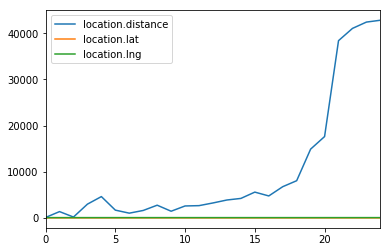

In [9]:
#dataframe.plot.scatter(x='location.lat',y='location.lng', c='DarkBlue')
dataframe.plot.line()

In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,ms coffee bar,Cafeteria,Ms Coffee Bar,IN,Salem,India,Maravanari,108,"[Ms Coffee Bar (Maravanari), Salem 636007, Tam...","[{'label': 'display', 'lat': 11.66179943084716...",11.661799,78.161041,636007,Tamil Nadu,52db9cd9498ebca1d3f51623
1,Coffee day coffee,Coffee Shop,SKS Hospital Salem,IN,NaN,India,NaN,1378,"[SKS Hospital Salem, India]","[{'label': 'display', 'lat': 11.66979323759267...",11.669793,78.151140,NaN,NaN,5294f0b8498e21323862c9af
2,Palani Appa Filter Coffee,Coffee Shop,NaN,IN,Salem,India,NaN,202,"[Salem 636007, Tamil Nadu, India]","[{'label': 'display', 'lat': 11.662223, 'lng':...",11.662223,78.158714,636007,Tamil Nadu,5cfafb1a588e36002cfff6f3
3,Coffee day beverages,None,@IP building,IN,NaN,India,NaN,2991,"[@IP building, India]","[{'label': 'display', 'lat': 11.64347499556045...",11.643475,78.139621,NaN,NaN,4ef06e074690b5157450e76c
4,Coffee World,Café,Shevaroys Food Mall,IN,Salem,India,"Meyyanur Road, 5 roads",4628,"[Shevaroys Food Mall (Meyyanur Road, 5 roads),...","[{'label': 'display', 'lat': 11.683652, 'lng':...",11.683652,78.124510,NaN,Tamil Nadu,4c513bda1c67ef3b239611b9


In [11]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the new Hotel

# add a red circle marker to represent the new Hotel
folium.features.CircleMarker(
    [11.676532, 78.160652],
    radius=10,
    color='red',
    popup='My_New_Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the other restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map